<a href="https://colab.research.google.com/github/aryasovaalexandra/praktika/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/crimes_against_women_2001-2014.csv')
df



,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
import pandas as pd
import numpy as np
def create_holes(dataframe, column_name, hole_percentage = 10):

    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


df = create_holes(df, 'Rape')
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.0,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23.0,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.0,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.0,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.0,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.0,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.0,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.0,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.0,6,1,20,7,3,0


In [ ]:
#Удаление
df_cleaned = df.dropna()
df_cleaned

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.0,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23.0,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.0,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.0,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.0,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.0,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.0,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.0,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.0,6,1,20,7,3,0


In [ ]:
#Заполнение при помощи медианы
df_filled_median = df.fillna(df.median())

df_filled_median

<ipython-input-5-1d6bd374d546>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.0,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23.0,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.0,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.0,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.0,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.0,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.0,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.0,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.0,6,1,20,7,3,0


In [ ]:
#Заполнение при помощи среднего

df_filled_mean = df.copy()
df_filled_mean["Rape"] = df["Rape"].fillna(df.Rape.mean())
df_filled_mean

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.00000,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,58.99615,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.00000,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.00000,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.00000,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.00000,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.00000,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.00000,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.00000,6,1,20,7,3,0


In [ ]:
df_filled_mode = df.fillna(df["Rape"].mode()[0])

df_filled_mode

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.0,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,0.0,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.0,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.0,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.0,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.0,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.0,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.0,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.0,6,1,20,7,3,0


In [ ]:
#Заполнение при помощи интерполяции
df_interpolated = df.copy()
df_interpolated["Rape"] = df["Rape"].fillna(df.interpolate().Rape)
df_interpolated

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50.0,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,38.5,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27.0,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20.0,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23.0,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1.0,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1.0,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3.0,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7.0,6,1,20,7,3,0


In [ ]:
df_cleaned.Rape.describe()

count    9610.000000
mean       58.996150
std       218.239815
min         0.000000
25%         8.000000
50%        22.000000
75%        44.000000
max      5076.000000
Name: Rape, dtype: float64

In [ ]:
df_filled_mean.Rape.describe()

count    10677.000000
mean        58.996150
std        207.046932
min          0.000000
25%         10.000000
50%         25.000000
75%         58.000000
max       5076.000000
Name: Rape, dtype: float64

In [ ]:
df_interpolated.Rape.describe()

count    10677.000000
mean        60.583919
std        217.791627
min          0.000000
25%          9.000000
50%         22.000000
75%         45.000000
max       5076.000000
Name: Rape, dtype: float64

In [ ]:
df.Rape.describe()

count    9610.000000
mean       58.996150
std       218.239815
min         0.000000
25%         8.000000
50%        22.000000
75%        44.000000
max      5076.000000
Name: Rape, dtype: float64

In [ ]:
df_filled_median.Rape.describe()

count    10677.000000
mean        55.298960
std        207.344052
min          0.000000
25%         10.000000
50%         22.000000
75%         41.000000
max       5076.000000
Name: Rape, dtype: float64

In [ ]:
df_filled_mode.Rape.describe()

count    10677.000000
mean        53.100403
std        207.801655
min          0.000000
25%          5.000000
50%         18.000000
75%         41.000000
max       5076.000000
Name: Rape, dtype: float64

In [ ]:
df_cleaned.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000,9610.000000
mean,3864.395109,2007.678356,57.843913,69.458793,20.150780,113.112591,27.700624,207.937877,0.167638
std,2810.354234,4.043535,212.720305,311.986443,98.139876,457.771605,171.855305,897.084531,2.167676
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1022.250000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3677.500000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6331.750000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,146.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [ ]:
df.describe()


,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,9610.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.843913,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,212.720305,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


И так, сначала я начала обработку заполнения данных, которых нет. Но у меня не было таких, в коллонке изнасилований в Индии, к сожалению, все данные были заполнены и я с помощью чудесного кода удалила некоторые из них и приступила к обработке. Сначала я сделала при помощи удаления этих данных ( реально зачем они), потом с помощью медианы, среднего, моды и самое тяжелое с помощью интерполяции. Как только я проделала все эти сложные махинации, нужно провести анализ, какой из этих методов самый крутой и изменяет наш датасет меньше всего, потому что если он изменяет его сильно, то в конце у нас будут неправильные результаты анализа. Первое что я сделала это вывела данные которые у нас есть в колонке изнасилований сейчас.
Чтож начнем!

*Среднее* - мне не очень понравилось, потому что он изменяет данные достаточно хорошо, ну количество(1067 разница) это понятно мы же из заполняем вот они и прибавляются, std  разница 11, а это достаточно много! 25%(2),50%(3),75%(14) квантили тоже все изменились, а который третий на 75% так вообще на 14. *Короче мне не очень нравится этот метод обработки*

*Интерполяция* - самое сложное в плане кода, ну количество тоже понятно(1067), среднее изменяет на 2, ну немного относительно, стандартное отклонение на 1, 25%(1), 75%(1), ну на самом деле мы щас будем рассматривать, но так спойлер, мне нравится этот вариант больше всего потому что тут меньше всего изменяется в этой коллонке, значит данные будут более точные,а это самое главное!

*Медиана* - счет уже понятно что изменяет (1067), среднее изменяется на 3, а это уже не 2 как в интерполяции, значит хуже, помимо этого  стандартное отклонение на *11*, я считаю это уже серьезно, поэтому уже дизлайк, а еще и 25%(2), 75%(3), короче не респект методу

*мода* - счет опять на 1067, тут вопрос не имеем. среднее на 2, ну ни рыба ни мясо короче, а вот КВАНТИЛИ в минус респекте у этого метода, не в таком как средний конечно, но в топ 2 он входит точно. 25%(5),50%(4)

Еще есть такая штучка как *удаление*, понятное дело оно никак не меняет именно коллонку с изнасилованиями, ну а как он может изменить что-то если данных не было и не было, удалили и никто и не заметит.

Но! Я решила посмотреть как изменяется файл вообще после удаления пропущенных данных в коллонке с изнасилованиями и мы можем увидеть что меняется практически все, все коллонки и данные впринципе становятся другими, значит удалять значения все таки не вариант! Лучше применять методы,которые я описала выше и выбирать который меньше всего изменяет датасет

Вот так вот! :)

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


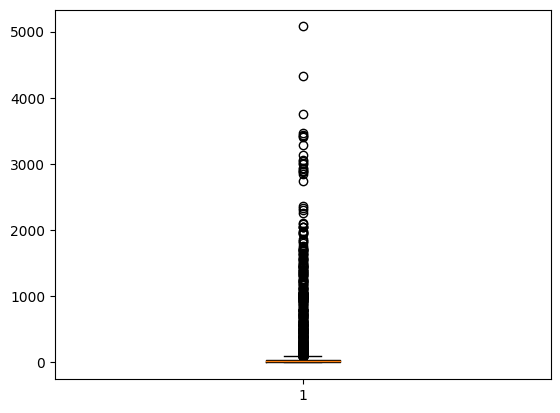

In [ ]:
#Методом среднего
df = df.dropna()
plt.boxplot(df["Rape"])
plt.show()

In [ ]:
df["Rape"].describe()

count    10677.000000
mean        57.989885
std        214.230398
min          0.000000
25%          8.000000
50%         22.000000
75%         44.000000
max       5076.000000
Name: Rape, dtype: float64

In [ ]:
mean = df["Rape"].mean()
std_deviation = df["Rape"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["Rape"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['Rape'].quantile(0.75)-df['Rape'].quantile(0.25))
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 57.21372338522097
Стандартное отклонение данных: 210.85175798822232
Межквартальный размах: 36.0
Потенциальные выбросы: [871, 817, 888, 959, 2851, 1302, 790, 1049, 1958, 709, 1002, 970, 1040, 992, 797, 2891, 1352, 691, 1051, 1415, 759, 946, 1095, 985, 898, 712, 2738, 1268, 725, 1050, 911, 1002, 1016, 1171, 1390, 969, 797, 2875, 1388, 770, 1038, 1397, 1475, 935, 1238, 1147, 990, 753, 2921, 1545, 799, 993, 1217, 1686, 1049, 1244, 1232, 995, 799, 2900, 1500, 985, 1085, 1314, 1731, 1070, 1437, 1555, 982, 855, 3010, 1451, 939, 1238, 1648, 2106, 1257, 1438, 1302, 978, 791, 2937, 1558, 1113, 1355, 1871, 2263, 1188, 1631, 929, 976, 719, 2998, 1483, 1023, 1519, 1759, 2336, 1362, 1721, 795, 1012, 720, 773, 3135, 1599, 1025, 1571, 1563, 2311, 1442, 1700, 934, 1053, 733, 784, 1132, 3406, 1701, 1112, 1800, 2042, 2363, 1341, 1716, 927, 1034, 812, 1019, 3425, 1839, 1458, 2049, 737, 1963, 2046, 706, 1635, 1937, 1128, 1380, 732, 971, 1204, 1030, 1221, 4335, 3063, 1832, 888, 3285

Для начала я вывела график на котором видно что уже много выбросов есть среди изнасилований, но в задании нужно еще по среднему это 57, а вот стандартное отклонение данных у меня 210, эти значения очень различаются и поэтому график такой, так же в доказательства я нашла по межквартальному размаху и он оказался 36, на самом деле не так уж и много, я думала будет больше.

Среднее значение 57 > 36 межквартальный размах, значит оно удаляет больше значений.


**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [ ]:
df = pd.concat((df, df.iloc[0:100]))
df.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,11178.000000,11178.000000,11178.000000,11178.000000,11178.000000,11178.000000,11178.000000,11178.000000,11178.000000
mean,3700.268832,2007.397746,57.213723,68.589372,19.927894,112.611201,28.233673,206.555556,0.179996
std,2863.888023,4.190930,210.851758,305.841198,96.490803,455.032191,171.281337,894.010094,2.197664
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,764.000000,2004.000000,8.000000,6.000000,0.000000,10.000000,0.000000,11.000000,0.000000
50%,3427.500000,2007.000000,22.000000,20.000000,5.000000,33.000000,1.000000,49.000000,0.000000
75%,6221.750000,2011.000000,44.000000,48.000000,16.000000,85.000000,12.000000,143.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


In [ ]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [ ]:
df_no_duplicates.describe()

,Unnamed: 0,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000
mean,3871.570198,2007.697949,57.989885,69.888358,20.181699,113.539196,27.419313,209.224314,0.175330
std,2816.369918,4.046874,214.230398,311.623450,98.276531,458.903951,167.806797,905.664362,2.228637
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1009.000000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3678.000000,2008.000000,22.000000,20.000000,5.000000,34.000000,2.000000,50.000000,0.000000
75%,6347.000000,2011.000000,44.000000,49.000000,16.000000,85.000000,12.000000,144.000000,0.000000
max,9016.000000,2014.000000,5076.000000,10626.000000,2469.000000,10001.000000,4970.000000,23278.000000,83.000000


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
num_features = df.select_dtypes(include=['int']).columns

num_features

Index(['Unnamed: 0', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [ ]:

from sklearn.preprocessing import MinMaxScaler
# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled['Assault on women with intent to outrage her modesty'].unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]


array([1.48985101e-02, 1.17988201e-02, 1.11988801e-02, 1.25987401e-02,
       1.08989101e-02, 9.99900010e-05, 1.38986101e-02, 4.13958604e-02,
       1.79982002e-02, 2.07979202e-02, 1.40985901e-02, 1.75982402e-02,
       9.99900010e-03, 1.87981202e-02, 2.06979302e-02, 5.49945005e-03,
       1.39986001e-02, 1.12988701e-02, 0.00000000e+00, 3.79962004e-03,
       8.39916008e-03, 6.69933007e-03, 3.29967003e-03, 3.99960004e-03,
       2.40975902e-02, 2.45975402e-02, 3.54364564e-01, 2.99970003e-04,
       3.99960004e-04, 4.99950005e-04, 7.99920008e-04, 5.99940006e-04,
       6.99930007e-04, 2.49975002e-03, 7.79922008e-03, 2.89971003e-03,
       2.19978002e-03, 7.99920008e-03, 5.59944006e-03, 2.59974003e-03,
       4.89951005e-03, 4.09959004e-03, 5.39946005e-03, 2.29977002e-03,
       2.69973003e-03, 4.39956004e-03, 4.19958004e-03, 8.99910009e-04,
       3.69963004e-03, 1.99980002e-04, 1.59984002e-03, 2.79972003e-03,
       4.29957004e-03, 8.49915008e-02, 1.09989001e-03, 1.29987001e-03,
      

In [ ]:

from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled['Assault on women with intent to outrage her modesty'].unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([ 7.72764415e-02,  9.72101569e-03, -3.35422801e-03,  2.71546739e-02,
       -9.89184986e-03, -2.45246236e-01,  5.54843686e-02,  6.54766371e-01,
        1.44831867e-01,  2.05849671e-01,  5.98427832e-02,  1.36115038e-01,
       -2.95047154e-02,  1.62265525e-01,  2.03670464e-01, -1.27569043e-01,
        5.76635759e-02, -1.17502073e-03, -2.47425444e-01, -1.64615567e-01,
       -6.43720319e-02, -1.01418556e-01, -1.75511603e-01, -1.60257152e-01,
        2.77763511e-01,  2.88659548e-01,  7.47568517e+00, -2.40887822e-01,
       -2.38708615e-01, -2.36529407e-01, -2.29991785e-01, -2.34350200e-01,
       -2.32170993e-01, -1.92945262e-01, -7.74472756e-02, -1.84228433e-01,
       -1.99482883e-01, -7.30888611e-02, -1.25389836e-01, -1.90766054e-01,
       -1.40644287e-01, -1.58077945e-01, -1.29748250e-01, -1.97303676e-01,
       -1.88586847e-01, -1.51540323e-01, -1.55898738e-01, -2.27812578e-01,
       -1.66794774e-01, -2.43067029e-01, -2.12558127e-01, -1.86407640e-01,
       -1.53719531e-01,  

In [ ]:
# Теперь мы можем в исходным df заменить признаки оригинальные признаки на отмасштабированыне

df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled['Assault on women with intent to outrage her modesty'] = df_std_scaled['Assault on women with intent to outrage her modesty']
df_scaled

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,0.077276,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,0.009721,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,-0.003354,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,0.027155,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,-0.009892,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,-0.245246,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,-0.245246,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,-0.221275,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,-0.203841,7,3,0


In [ ]:
df_minmax_scaled

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,0.009850,0.002823,0.006480,0.014899,0.006841,0.007518,0.000000
1,1,ANDHRA PRADESH,ANANTAPUR,2001,0.004531,0.002823,0.002835,0.011799,0.004829,0.006616,0.000000
2,2,ANDHRA PRADESH,CHITTOOR,2001,0.005319,0.003200,0.005670,0.011199,0.016700,0.007990,0.000000
3,3,ANDHRA PRADESH,CUDDAPAH,2001,0.003940,0.001882,0.006885,0.012599,0.007646,0.002449,0.000000
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,0.004531,0.002447,0.004860,0.010899,0.011670,0.010611,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,95,BIHAR,MOTIHARI,2001,0.008668,0.003294,0.014986,0.000300,0.000201,0.002019,0.000000
96,96,BIHAR,MUNGER,2001,0.002167,0.001412,0.003240,0.000000,0.000000,0.001675,0.000000
97,97,BIHAR,MUZAFFARPUR,2001,0.014381,0.002353,0.027947,0.008099,0.000000,0.006057,0.072289
98,98,BIHAR,MUZAFFARPUR RLY.,2001,0.000394,0.000094,0.000000,0.000400,0.000000,0.000043,0.000000


In [ ]:
#for col in df.iloc[:, 4:11].columns:
 # df[col] = df[col].astype(float)

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
df["STATE/UT "] = df["STATE/UT"].astype("category")
df["DISTRICT"] = df["DISTRICT"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Unnamed: 0                                           10677 non-null  int64   
 1   STATE/UT                                             10677 non-null  object  
 2   DISTRICT                                             10677 non-null  category
 3   Year                                                 10677 non-null  int64   
 4   Rape                                                 10677 non-null  int64   
 5   Kidnapping and Abduction                             10677 non-null  int64   
 6   Dowry Deaths                                         10677 non-null  int64   
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64   
 8   Insult to modesty of Women                           106

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns) # получаем датафрейм с закодированными признаками
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,DISTRICT_24 PARGANAS SOUTH,DISTRICT_A and N ISLANDS,DISTRICT_ADILABAD,DISTRICT_AGAR,DISTRICT_AGRA,DISTRICT_AHMEDABAD COMMR.,DISTRICT_AHMEDABAD RURAL,DISTRICT_AHMEDNAGAR,DISTRICT_AHWA-DANG,DISTRICT_AIZAWL,...,STATE/UT _TRIPURA,STATE/UT _Tamil Nadu,STATE/UT _Telangana,STATE/UT _Tripura,STATE/UT _UTTAR PRADESH,STATE/UT _UTTARAKHAND,STATE/UT _Uttar Pradesh,STATE/UT _Uttarakhand,STATE/UT _WEST BENGAL,STATE/UT _West Bengal
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Добавляем новые закодированные признаки в копию датафрейма
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,Unnamed: 0,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,...,STATE/UT _TRIPURA,STATE/UT _Tamil Nadu,STATE/UT _Telangana,STATE/UT _Tripura,STATE/UT _UTTAR PRADESH,STATE/UT _UTTARAKHAND,STATE/UT _Uttar Pradesh,STATE/UT _Uttarakhand,STATE/UT _WEST BENGAL,STATE/UT _West Bengal
0,0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,2014,1,0,0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10673,833,Lakshadweep,2014,1,0,0,1,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10674,834,Puducherry,2014,3,1,0,12,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,835,Puducherry,2014,7,6,1,20,7,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])